## Lab 10: Implement policy gradient methods for policy search

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 4
n_actions = 4
gamma = 0.9  
alpha = 0.01 
n_episodes = 1000

actions = ['up', 'down', 'left', 'right']
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

goal_state = (3, 3)
reward_goal = 1
reward_step = -0.1

policy_params = np.random.rand(grid_size, grid_size, n_actions)

### Softmax

In [2]:
def softmax(x):
    exp_x = np.exp(x - np.max(x)) 
    return exp_x / exp_x.sum(axis=-1, keepdims=True)

### Action

In [3]:
def get_action(state):
    row, col = state
    probs = softmax(policy_params[row, col])
    action_idx = np.random.choice(len(probs), p=probs)
    return actions[action_idx], action_idx

### State

In [4]:
def get_next_state(state, action):
    row, col = state
    dr, dc = action_effects[action]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= grid_size or new_col < 0 or new_col >= grid_size:
        return state 
    return (new_row, new_col)

### Episode

In [5]:
def generate_episode():
    state = (0, 0)  
    episode = [] 
    while state != goal_state:
        action, action_idx = get_action(state)
        next_state = get_next_state(state, action)
        reward = reward_goal if next_state == goal_state else reward_step
        episode.append((state, action_idx, reward))
        state = next_state
    return episode

### Policy Update

In [6]:
def update_policy(episode):
    global policy_params
    G = 0  
    for t in reversed(range(len(episode))):
        state, action_idx, reward = episode[t]
        G = reward + gamma * G 
        row, col = state

        probs = softmax(policy_params[row, col])
        grad_log = -probs  
        grad_log[action_idx] += 1 
        policy_params[row, col] += alpha * G * grad_log

### Training

In [7]:
for episode_num in range(n_episodes):
    episode = generate_episode()
    update_policy(episode)
    if episode_num % 100 == 0:
        print(f"Episode {episode_num} completed.")

Episode 0 completed.
Episode 100 completed.
Episode 200 completed.
Episode 300 completed.
Episode 400 completed.
Episode 500 completed.
Episode 600 completed.
Episode 700 completed.
Episode 800 completed.
Episode 900 completed.


### Visualisation

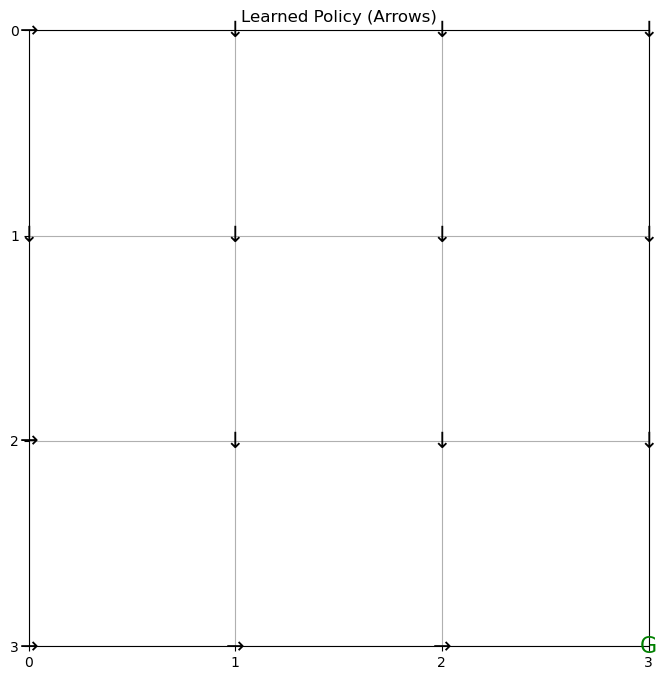

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for row in range(grid_size):
    for col in range(grid_size):
        if (row, col) == goal_state:
            plt.text(col, row, "G", ha='center', va='center', fontsize=16, color='green')
        else:
            probs = softmax(policy_params[row, col])
            action = actions[np.argmax(probs)]
            arrow = {"up": "↑", "down": "↓", "left": "←", "right": "→"}[action]
            plt.text(col, row, arrow, ha='center', va='center', fontsize=16)
plt.title("Learned Policy (Arrows)")
plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## END